# Video Games Sales Analysis

## by Justin Sierchio

In this analysis, we will be looking at video game sales. We would like to be able to answer the following questions:

<ul>
    <li>What were the most popular games? Where were they popular?</li>
    <li>What genres sell better over time?</li>
    <li>What are some other conclusions we might able to draw from this analysis?</li>
</ul>

This data is in .csv file format and is from Kaggle at: https://www.kaggle.com/gregorut/videogamesales/download. More information related to the dataset can be found at: https://www.kaggle.com/gregorut/videogamesales.

## Notebook Initialization

In [1]:
# Import Relevant Libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import datetime

print('Initial libraries loaded into workspace!')

Initial libraries loaded into workspace!


In [2]:
# Upload Datasets for reviews
df_GAMESALES = pd.read_csv("vgsales.csv");

print('Datasets uploaded!');

Datasets uploaded!


In [3]:
# Display 1st 5 rows from Video Game Sales dataset
df_GAMESALES.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## Data Cleaning

Let's take a look at the structure of the data to see if any cleaning is necessary prior to analysis.

In [4]:
# Determine data types from video games sales dataset
df_GAMESALES.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In order to get a better view, let's look at where the NULL values are.

In [5]:
# Investigate 'NULL' values from video game sales dataset
df_GAMESALES.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

For 'year', let's replace the missing data with the mean value for year. Then for 'publisher' we will remove the missing rows.

In [6]:
# Clean the 'year' column by using the mean; remove the missing 'pubisher' data from the dataset
df_GAMESALES['Year'] = df_GAMESALES['Year'].fillna(df_GAMESALES['Year'].mean())
df_GAMESALES = df_GAMESALES.dropna(axis=0)

# Show updated 'NULL' value counts for dataset
df_GAMESALES.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [7]:
# Show updated data types from video games sales dataset
df_GAMESALES.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16540 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16540 non-null  int64  
 1   Name          16540 non-null  object 
 2   Platform      16540 non-null  object 
 3   Year          16540 non-null  float64
 4   Genre         16540 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16540 non-null  float64
 7   EU_Sales      16540 non-null  float64
 8   JP_Sales      16540 non-null  float64
 9   Other_Sales   16540 non-null  float64
 10  Global_Sales  16540 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


The dataset looks sufficiently clean for further analysis.

## Exploratory Data Analysis

Let's begin by looking at the relationships among the different columns in this dataset.

<AxesSubplot:>

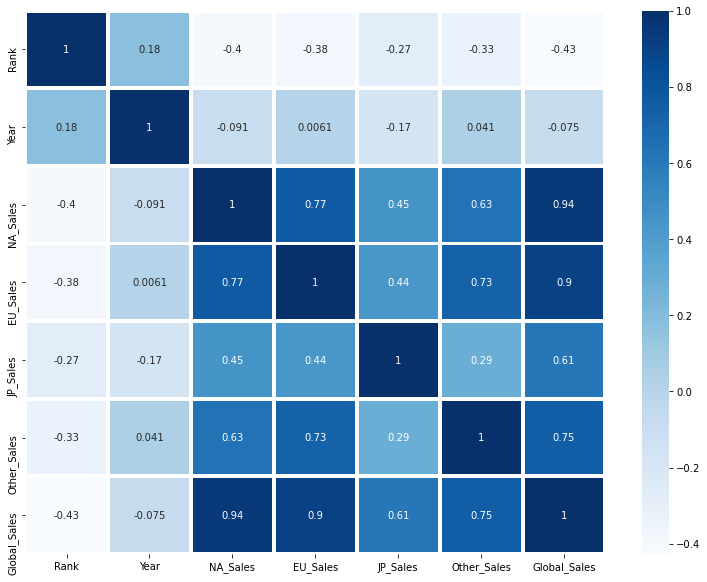

In [8]:
# Ceate a heatmap to get a sense of relationships among the different columns in the video game sales dataset
plt.figure(figsize=(13,10))
sns.heatmap(df_GAMESALES.corr(), cmap = "Blues", annot=True, linewidth=3)

We notice a few pattens from this heatmap.

<ul>
    <li>Global sales are strongly correlated with North American sales.</li>
    <li>Other sales are most strongly correlated with European sales (compared to North America, Europe and Japan).</li>
    <li>Year and sales have weak correlations.</li>
</ul>

Let's now take a look at what kinds of games sell by region.

In [9]:
# Show game sales by different region for the dataset
df_GAMESALES.groupby(df_GAMESALES['Genre']).sum()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,,,
Action,26361435,6.644075e+06,877.54,524.92,159.49,187.35,1750.33
Adventure,14778800,2.574406e+06,105.67,64.08,51.99,16.81,238.77
Fighting,6476418,1.695935e+06,221.92,100.22,87.35,36.24,445.70
Misc,14667633,3.436475e+06,404.67,213.93,107.72,75.22,802.15
Platform,6118339,1.771393e+06,447.05,201.13,130.77,51.59,830.87
Puzzle,5586639,1.165050e+06,123.78,50.77,57.31,12.55,244.94
Racing,9927387,2.502070e+06,359.42,238.38,56.69,77.27,732.03
Role-Playing,12002392,2.982468e+06,327.28,188.05,352.26,59.61,927.31
Shooter,9623676,2.623755e+06,582.59,313.24,38.28,102.69,1037.32


We see that in each region, the leading genres are Action, Sports and Shooter games.

Now let's look at the overall sales for each genre compared to one another over the last 5 years of data.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '2009.0'),
  Text(1, 0, '2008.0'),
  Text(2, 0, '2010.0'),
  Text(3, 0, '2007.0'),
  Text(4, 0, '2011.0')])

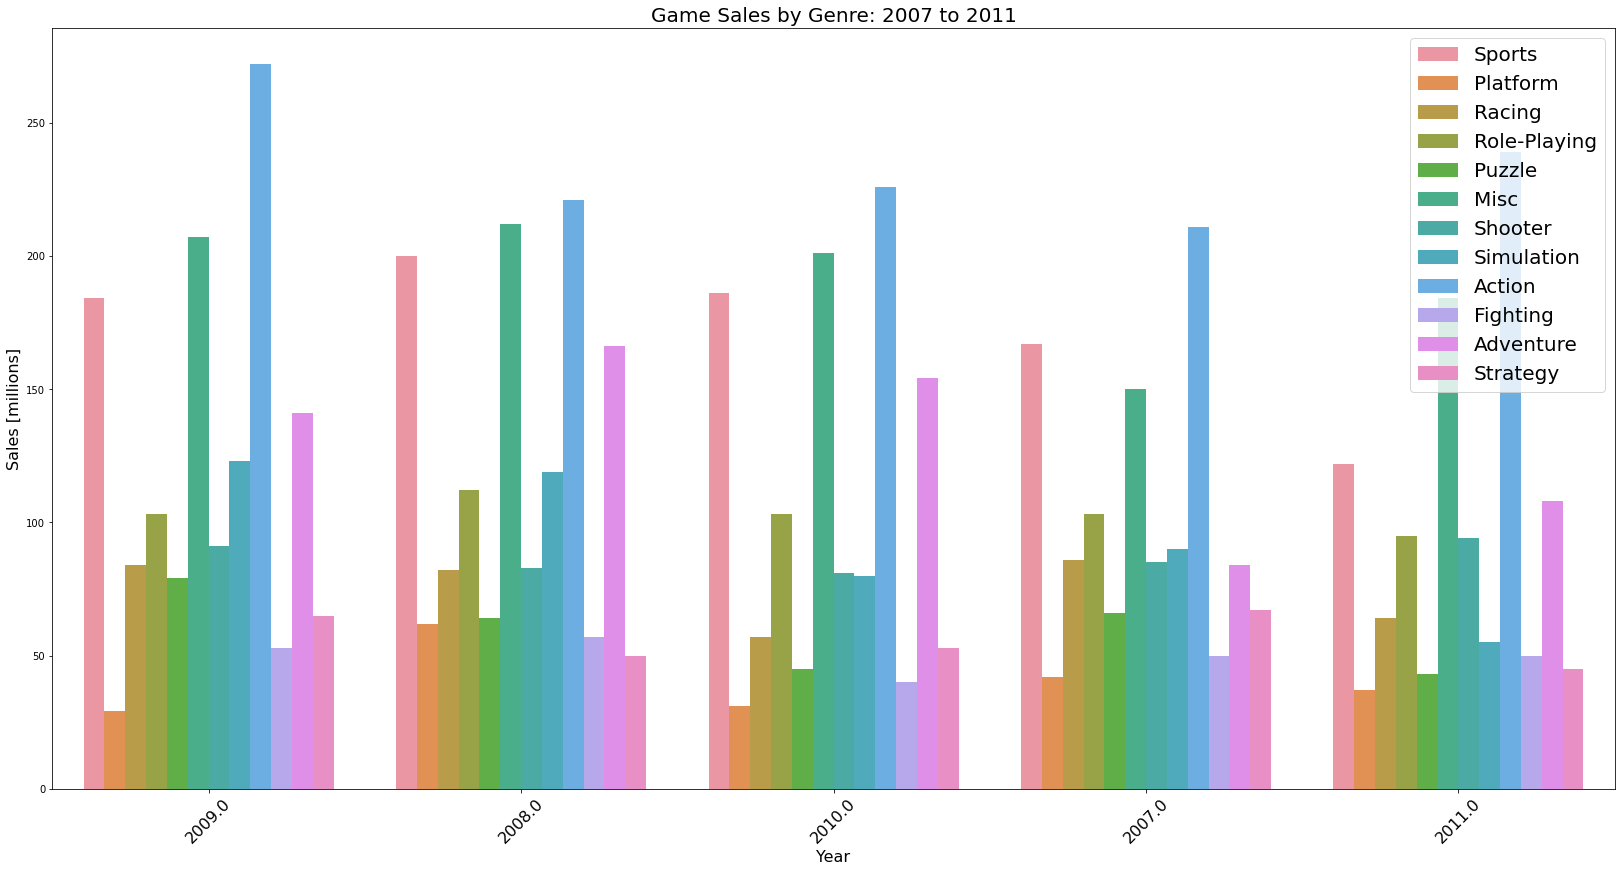

In [10]:
# Create a plot showing the last 5 years of game sales data from the dataset

# Create the plot
plt.figure(figsize=(28, 14))
sns.countplot(x="Year", data=df_GAMESALES, hue='Genre', order=df_GAMESALES.Year.value_counts().iloc[:5].index)

# Format the plot
plt.title('Game Sales by Genre: 2007 to 2011', fontsize = 20)
plt.ylabel('Sales [millions]', fontsize = 16)
plt.xlabel('Year', fontsize = 16)
plt.legend(fontsize=20)
plt.xticks(size=16, rotation=45)

As we can see, the sales of games seems to have peaked around 2009 and begun to decline subsequently.

At this point, let's find out what the Top 10 publishers were over this time period.

<AxesSubplot:title={'center':'Top 10 Publishers'}, xlabel='Publisher Name', ylabel='Sales '>

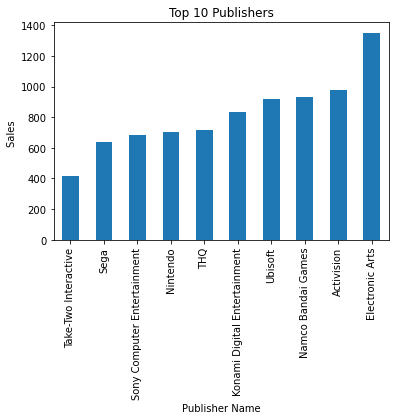

In [11]:
# Plot the Top 10 publishers over the time period from this dataset

# Find the Top 10 Publishers
df_GAMESALES['Publisher'].value_counts().sort_values(ascending=True).tail(10).plot(kind='bar', 
                                                                                   title = 'Top 10 Publishers',
                                                                                  xlabel = 'Publisher Name', 
                                                                                  ylabel = 'Sales ')

Let's now do a word analysis to see what games come up most frequently in a genre. We'll use 'Sports' as the example here.

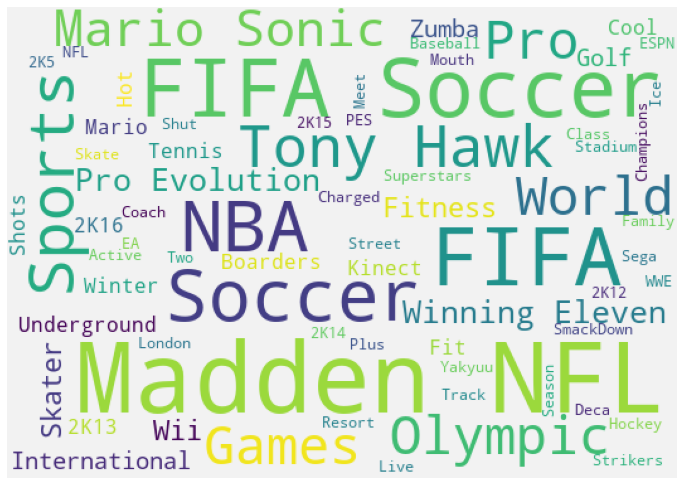

In [17]:
# Generate a word cloud to assess 'sports' in the dataset

# Import needed library
from wordcloud import WordCloud

# Construct wordcloud
df_GAMESALES_wc = df_GAMESALES[df_GAMESALES.Genre == 'Sports'].iloc[:100,:]
plt.subplots(figsize = (12,12))
wordcloud = WordCloud(
                        background_color='#f2f2f2',
                        width=532,
                        height=374
                     ).generate(" ".join(df_GAMESALES_wc.Name))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('GameSalesWordCloud_Sorts.png')
plt.show()

We can see the most common games are Madden (NFL), FIFA (Soccer) and Tony Hawk (rollerblading).